In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Pest Pros and Alsum clean cpb data 2014-2024.csv')
df.head(3)

,row_id,grower,farm,field,field_fvid,lat,lng,date,year,week,...,name_of_scout,param,count,value,edges,patches,tmin,tmax,gdd,cum_gdd
0,2,Alsum Farms,Alsum Farms Grand Marsh,Pines,1273426,43.972199,-89.605148,2024-09-03,2024,36,...,Tim Gross,"Beetle, Colorado potato - adults - Count per 2...",0.0,0.0,NaN,NaN,48.036263,75.547083,10.439880,1919.064835
1,2,Alsum Farms,Alsum Farms Grand Marsh,Pines,1273426,43.972199,-89.605148,2024-09-03,2024,36,...,Tim Gross,"Beetle, Colorado potato - larvae - Count per 2...",0.0,0.0,0.0,0.0,48.036263,75.547083,10.439880,1919.064835
2,4,Alsum Farms,Alsum Farms Arena,001,983803,43.173425,-89.977533,2024-08-26,2024,35,...,NaN,"Beetle, Colorado potato - adults - Count per 2...",1.0,1.0,NaN,NaN,70.101982,93.932563,28.001965,2035.133698


In [5]:
print(f"Original Data Shape:  {df.shape}")
print(f"Amount of Row_id:     {df['row_id'].nunique()}")
print(f"Unique Fields amount: {df['field_fvid'].nunique()}")
print(f"Years in the dataset: {df['year'].unique()} ")

Original Data Shape:  (92578, 21)
Amount of Row_id:     39492
Unique Fields amount: 1853
Years in the dataset: [2024 2023 2022 2021 2020 2019 2018 2014 2015 2016 2017] 


### Extracting abundance data (adult, larva, egg mass)

Restructure abundance data (adult, larva, egg mass) currently within a single 'param' column.
group_id: Unique group identifier.
param: Specifies abundance type (adult, larva, egg mass).

We have created 6 new columns: `_count, _valu

In [8]:
def process_row_id(group):
    first_row = group.iloc[0].copy()
    
    for param_type in ['adults', 'larvae', 'egg masses']:
        matching_row = group[group['param'].str.contains(param_type, case=False, na=False)]
        if not matching_row.empty:
            first_row[f'cpb{param_type[0]}_count'] = matching_row['count'].iloc[0]
            first_row[f'cpb{param_type[0]}_value'] = matching_row['value'].iloc[0]
        else:
            # If no data is available for this type, fill with NaN
            first_row[f'cpb{param_type[0]}_count'] = None
            first_row[f'cpb{param_type[0]}_value'] = None
    
    return first_row

final_data = df.groupby('row_id').apply(process_row_id)

final_data = final_data.reset_index(drop=True)

columns_to_drop = ['param', 'count', 'value', 'edges', 'patches']
final_data = final_data.drop(columns=columns_to_drop, errors='ignore')

print(final_data.shape)
print(final_data.head())

final_data.to_csv("output_data/1_extracted_abd_data.csv", index=False)

(39492, 22)
   row_id       grower                     farm   field  field_fvid  \
0       2  Alsum Farms  Alsum Farms Grand Marsh   Pines     1273426   
1       4  Alsum Farms        Alsum Farms Arena     001      983803   
2       8  Alsum Farms        Alsum Farms Arena     040      983811   
3      11  Alsum Farms  Alsum Farms Grand Marsh  Goggin      799043   
4      16  Alsum Farms  Alsum Farms Grand Marsh  Miller      799044   

         lat        lng        date  year  week  ...       tmin       tmax  \
0  43.972199 -89.605148  2024-09-03  2024    36  ...  48.036263  75.547083   
1  43.173425 -89.977533  2024-08-26  2024    35  ...  70.101982  93.932563   
2  43.165688 -89.945721  2024-08-26  2024    35  ...  70.025549  93.818913   
3  43.921085 -89.700531  2024-08-26  2024    35  ...  68.150575  95.022789   
4  43.941391 -89.647851  2024-08-20  2024    34  ...  45.230355  72.977558   

         gdd      cum_gdd  cpba_count  cpba_value  cpbl_count  cpbl_value  \
0  10.439880  1

In [9]:
final_data.shape

(39492, 22)

In [34]:
df_sorted = final_data.sort_values(by=['year','field_fvid'], ascending = [False, True])
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head()

,row_id,grower,farm,field,field_fvid,lat,lng,date,year,week,...,tmin,tmax,gdd,cum_gdd,cpba_count,cpba_value,cpbl_count,cpbl_value,cpbe_count,cpbe_value
0,65861,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2024-07-16,2024,29,...,57.496533,83.392599,18.444566,1201.560011,7.0,7.0,2.0,2.0,NaN,NaN
1,65872,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2024-07-02,2024,27,...,58.610272,67.832998,11.221635,920.288357,0.0,0.0,30.0,30.0,0.0,0.0
2,65873,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2024-08-06,2024,32,...,49.056946,76.641841,11.261895,1600.945697,5.0,5.0,6.0,6.0,NaN,NaN
3,65880,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2024-07-09,2024,28,...,62.749187,84.166750,21.457969,1046.466553,5.0,5.0,3.0,3.0,NaN,NaN
4,65884,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2024-06-18,2024,25,...,69.449046,90.054767,26.972452,716.469060,5.0,5.0,50.0,50.0,0.2,0.2


### Frequency of Field Measurements per Year

We aim to determine how often the abundance rate was measured by a single field in one year and analyze the distribution of these measurement frequencies.

In [37]:
measurement_counts = df_sorted.groupby(['field_fvid', 'year']).size().reset_index(name='amount')

print(measurement_counts)

measurement_counts.to_csv("output_data/2_measurement_counts.csv", index=False)

      field_fvid  year  amount
0          62992  2014      14
1          62992  2017      11
2          62992  2020      13
3          62992  2023      11
4          62995  2014       1
...          ...   ...     ...
3337     1274214  2024       9
3338     1274961  2024       7
3339     1274962  2024       5
3340     1275504  2024       9
3341     1276782  2024       9

[3342 rows x 3 columns]


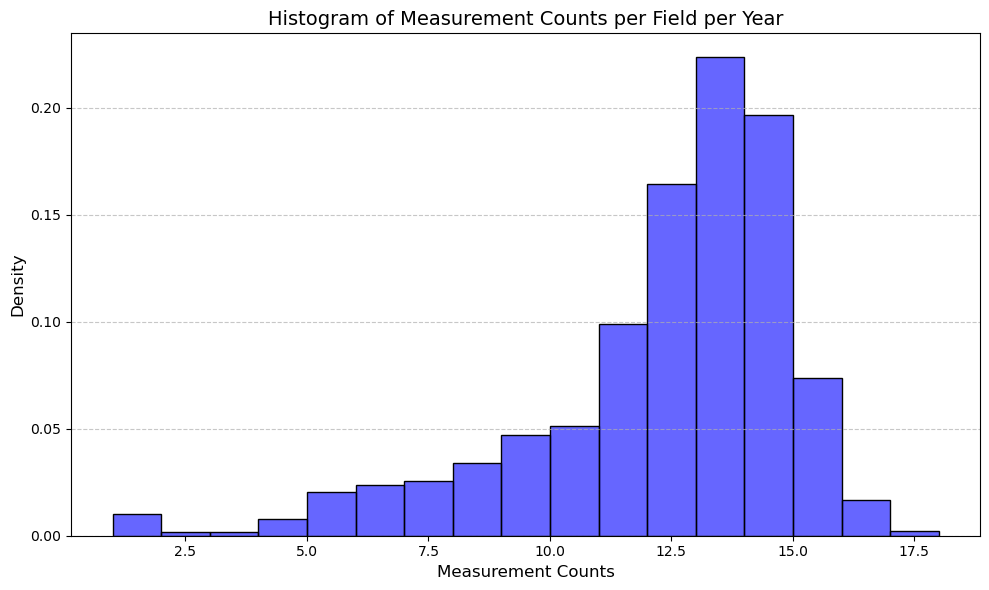

In [39]:
bins = range(1, measurement_counts['amount'].max() + 2) 

plt.figure(figsize=(10, 6))
sns.histplot(
    measurement_counts['amount'],
    bins=bins,
    kde=False,  
    color='blue',
    stat="density",
    alpha=0.6
)

plt.title("Histogram of Measurement Counts per Field per Year", fontsize=14)
plt.xlabel("Measurement Counts", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [41]:
measurement_counts["amount"].min()

1

### Annual Average Abundance Calculation

We calculated annual averages for abundance rates and climate data: tmin (minimum), tmax (maximum), gdd (average), and cum_gdd (latest value).

In [44]:
df_sorted[(df_sorted['field_fvid'] == 62992) & (df_sorted['year'] == 2014)] 
#1273426   983803
# how it looks like, just example

,row_id,grower,farm,field,field_fvid,lat,lng,date,year,week,...,tmin,tmax,gdd,cum_gdd,cpba_count,cpba_value,cpbl_count,cpbl_value,cpbe_count,cpbe_value
37039,65075,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-08-06,2014,32,...,55.351055,83.173633,17.262344,1473.692711,1.0,1.0,1.0,1.0,NaN,NaN
37040,65076,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-05-23,2014,21,...,44.815974,75.919607,9.869786,193.993574,NaN,NaN,25.0,25.0,NaN,NaN
37041,65078,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-07-16,2014,29,...,45.073396,74.058084,9.040152,1112.012234,1.0,1.0,2.0,2.0,0.02,0.02
37042,65086,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-08-21,2014,34,...,65.158902,79.453396,20.306149,1727.895721,5.0,5.0,2.0,2.0,NaN,NaN
37043,65090,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-07-09,2014,28,...,50.454687,75.701480,11.241356,1021.003783,1.0,1.0,3.0,3.0,0.02,0.02
37044,65093,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-05-21,2014,21,...,45.774687,79.058907,11.582223,175.993295,20.0,20.0,NaN,NaN,NaN,NaN
37045,65096,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-05-23,2014,21,...,44.815974,75.919607,9.869786,193.993574,5.0,5.0,NaN,NaN,NaN,NaN
37046,65097,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-08-13,2014,33,...,46.258902,81.941716,13.094268,1584.154178,4.0,4.0,1.0,1.0,NaN,NaN
37047,65105,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-07-30,2014,31,...,55.061243,77.177847,14.119545,1352.450202,1.0,1.0,1.0,1.0,NaN,NaN
37048,65106,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014-07-03,2014,27,...,47.574687,77.100425,11.076136,919.582013,2.0,2.0,3.0,3.0,NaN,NaN


In [46]:
average_columns = [
    'gdd', 'cpba_count', 'cpba_value',
    'cpbl_count', 'cpbl_value', 'cpbe_count', 'cpbe_value'
]
min_max_columns = ['tmin', 'tmax']  # Specific min and max calculations
first_row_columns = [
    'grower', 'farm', 'field', 'field_fvid', 
    'lat', 'lng', 'year'
]

columns_to_drop = ['week', 'row_id']  # Retain 'yday' for sorting
df_sorted = df_sorted.drop(columns=columns_to_drop, errors='ignore')

df_sorted = df_sorted.sort_values(by=['year', 'field_fvid', 'yday'])

agg_dict = {col: 'mean' for col in average_columns} 
agg_dict.update({'cum_gdd': 'last'})  
agg_dict.update({'tmin': 'min'})  # Minimum temperature
agg_dict.update({'tmax': 'max'})  # Maximum temperature
agg_dict.update({col: 'first' for col in first_row_columns})  # Take first for identifiers

annual_data = df_sorted.groupby(['year', 'field_fvid'], as_index=False).agg(agg_dict)

ordered_columns = first_row_columns + min_max_columns + average_columns + ['cum_gdd']
annual_data = annual_data[ordered_columns]

print(annual_data.head())
annual_data.to_csv("output_data/3_annual_averages.csv", index=False)

                    grower farm           field  field_fvid        lat  \
0  Wisconsin Central Farms  WCF       1 Necedah       62992  44.057164   
1  Wisconsin Central Farms  WCF      12 Hollman       62995  44.202219   
2  Wisconsin Central Farms  WCF  13 Nepco N 1/2       62996  44.209406   
3  Wisconsin Central Farms  WCF      16 13th St       62999  44.100775   
4  Wisconsin Central Farms  WCF      26 Huebner       63009  44.171606   

         lng  year       tmin       tmax        gdd  cpba_count  cpba_value  \
0 -90.040412  2014  44.815974  83.173633  13.772113    3.307692    3.307692   
1 -90.021252  2014 -12.569807  13.704226   0.000000         NaN         NaN   
2 -90.021382  2014  45.498328  79.713370  12.804045    4.562500    4.500000   
3 -90.050524  2014  45.224964  82.761841  14.263578    1.637500    1.781818   
4 -89.975877  2014  45.584387  82.216665  13.292737    2.181818    2.000000   

   cpbl_count  cpbl_value  cpbe_count  cpbe_value      cum_gdd  
0    3.900000  

### Data Cleaning: Handling Missing Values and Unused Columns

We tested annual_data for missing values and found that several abundance records for adults and larvae were missing. Additionally, the eggs_mass column was removed as it is not used in further analysis.

In total, 11 rows were removed after cleaning.

In [49]:
print(annual_data.shape)
print(annual_data.isnull().sum())

(3342, 17)
grower          0
farm            0
field           0
field_fvid      0
lat             0
lng             0
year            0
tmin            0
tmax            0
gdd             0
cpba_count      5
cpba_value      5
cpbl_count      8
cpbl_value      8
cpbe_count    216
cpbe_value    217
cum_gdd         0
dtype: int64


In [51]:
columns_to_remove = ['cpbe_count', 'cpbe_value']
df_filtered = annual_data.drop(columns=columns_to_remove, errors='ignore')
missed_columns = ['cpba_count', 'cpba_value', 'cpbl_count', 'cpbl_value']
df_filtered = df_filtered.dropna(subset=missed_columns)

print(df_filtered.isnull().sum())
print(df_filtered.shape)

grower        0
farm          0
field         0
field_fvid    0
lat           0
lng           0
year          0
tmin          0
tmax          0
gdd           0
cpba_count    0
cpba_value    0
cpbl_count    0
cpbl_value    0
cum_gdd       0
dtype: int64
(3331, 15)


In [53]:
print(df_filtered.head())
df_filtered.to_csv("output_data/4_filtered_annual_data.csv", index=False)

                    grower farm           field  field_fvid        lat  \
0  Wisconsin Central Farms  WCF       1 Necedah       62992  44.057164   
2  Wisconsin Central Farms  WCF  13 Nepco N 1/2       62996  44.209406   
3  Wisconsin Central Farms  WCF      16 13th St       62999  44.100775   
4  Wisconsin Central Farms  WCF      26 Huebner       63009  44.171606   
5  Wisconsin Central Farms  WCF        7 N Home       63016  44.329762   

         lng  year       tmin       tmax        gdd  cpba_count  cpba_value  \
0 -90.040412  2014  44.815974  83.173633  13.772113    3.307692    3.307692   
2 -90.021382  2014  45.498328  79.713370  12.804045    4.562500    4.500000   
3 -90.050524  2014  45.224964  82.761841  14.263578    1.637500    1.781818   
4 -89.975877  2014  45.584387  82.216665  13.292737    2.181818    2.000000   
5 -89.931300  2014  45.715179  78.727568  12.237354    1.200000    1.200000   

   cpbl_count  cpbl_value      cum_gdd  
0    3.900000    3.900000  1727.895721 

In [55]:
df_filtered['field_fvid'].nunique()

1849

### Analysis of Adult and Larvae Abundance: count vs. value

We tested the distributions of adult and larvae abundance using the count and value measurements. From the density plots, we observed that their distributions look approximately similar.

Next, we plotted a line chart to visualize the annual trends for both count and value. The results indicate that the trends are also very similar across years, making it unclear which measurement (count or value) would be more suitable to use for analysis.

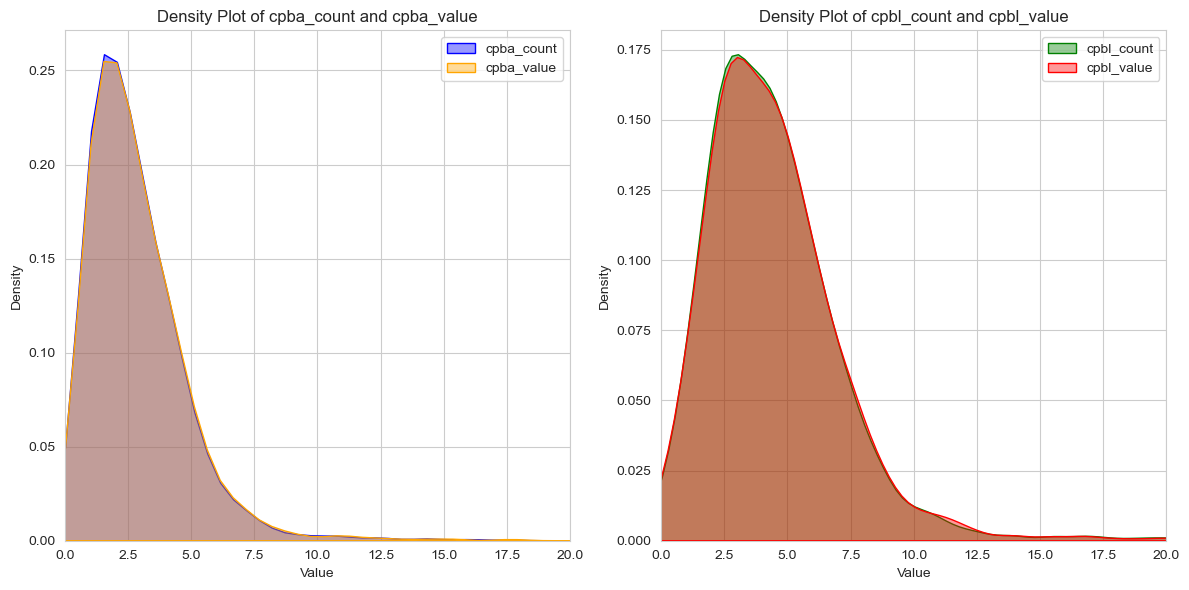

In [58]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_filtered, x='cpba_count', label='cpba_count', color='blue', fill=True, alpha=0.4)
sns.kdeplot(data=df_filtered, x='cpba_value', label='cpba_value', color='orange', fill=True, alpha=0.4)
plt.title("Density Plot of cpba_count and cpba_value")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim([0,20])
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_filtered, x='cpbl_count', label='cpbl_count', color='green', fill=True, alpha=0.4)
sns.kdeplot(data=df_filtered, x='cpbl_value', label='cpbl_value', color='red', fill=True, alpha=0.4)
plt.title("Density Plot of cpbl_count and cpbl_value")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim([0,20])
plt.legend()

plt.tight_layout()
plt.show()

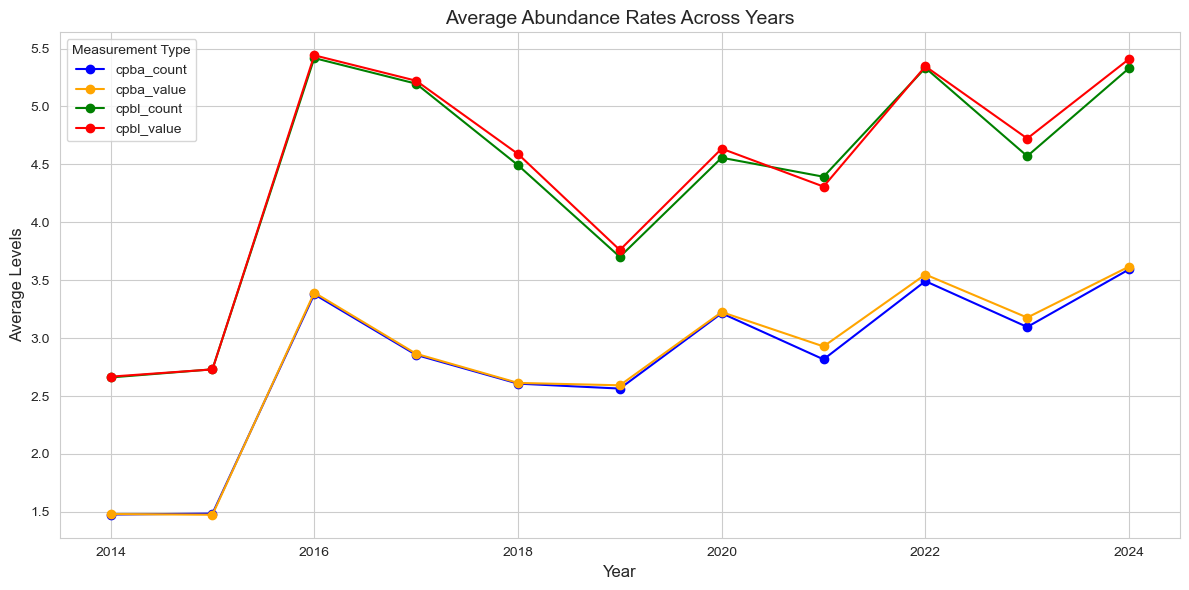

In [60]:
annual_avg = df_filtered.groupby('year').agg({
    'cpba_count': 'mean',
    'cpba_value': 'mean',
    'cpbl_count': 'mean',
    'cpbl_value': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))


plt.plot(annual_avg['year'], annual_avg['cpba_count'], label='cpba_count', color='blue', marker='o')
plt.plot(annual_avg['year'], annual_avg['cpba_value'], label='cpba_value', color='orange', marker='o')

plt.plot(annual_avg['year'], annual_avg['cpbl_count'], label='cpbl_count', color='green', marker='o')
plt.plot(annual_avg['year'], annual_avg['cpbl_value'], label='cpbl_value', color='red', marker='o')

plt.title("Average Abundance Rates Across Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Levels", fontsize=12)
plt.legend(title="Measurement Type", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

### Visualization of Field Amount Across Years

Here, we visualized how many fields have data across the years. From the first plot, we observe that almost all years have a similar number of fields with data.

In the second plot, we see that most fields have information for only one year. As the number of years increases, the number of fields with data decreases significantly. This highlights that fields with multi-year data are relatively rare in the dataset.

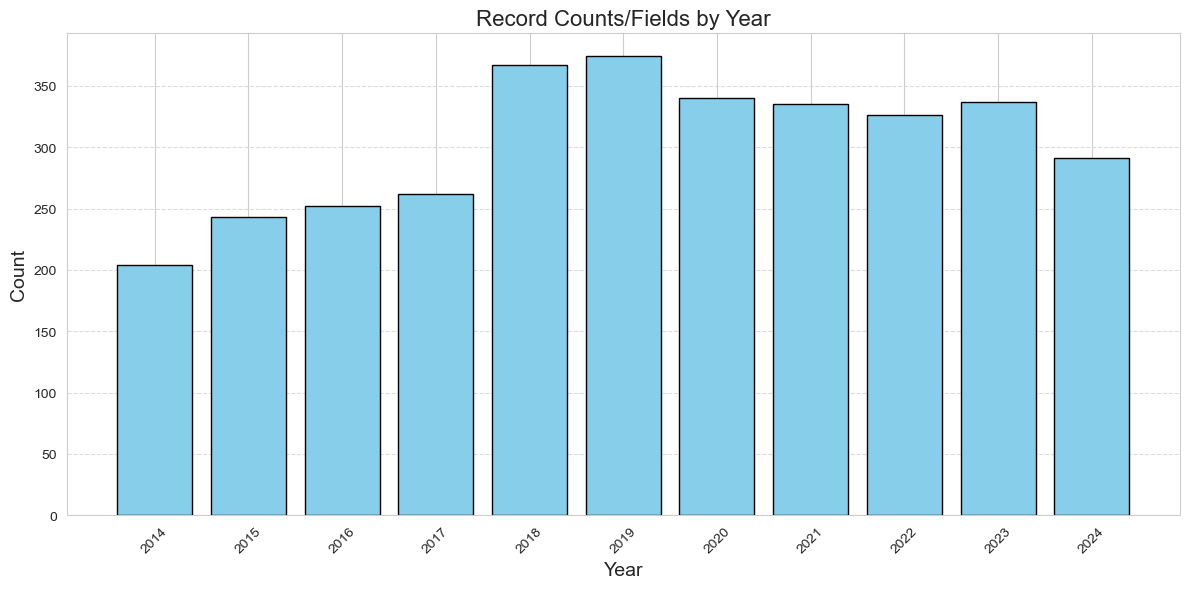

In [63]:
year_counts = df_filtered['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')

plt.title('Record Counts/Fields by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(year_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

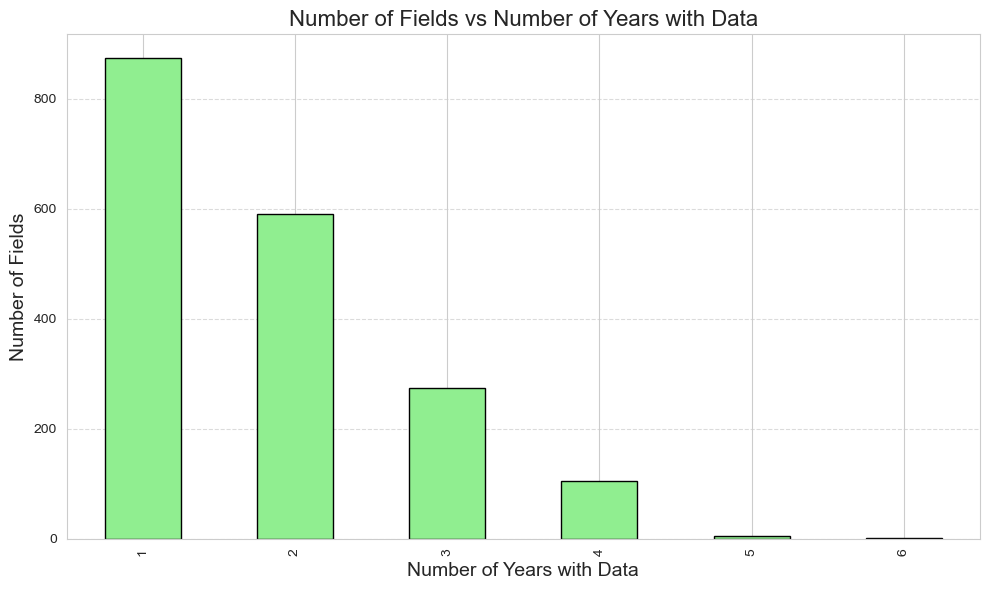

In [65]:
years_per_field = df_filtered.groupby('field_fvid')['year'].nunique()
fields_per_year_count = years_per_field.value_counts().sort_index()

plt.figure(figsize=(10, 6))
fields_per_year_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Fields vs Number of Years with Data', fontsize=16)
plt.xlabel('Number of Years with Data', fontsize=14)
plt.ylabel('Number of Fields', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Identifying Crop Type

We identified the crop type by analyzing a central 7x7 pixel window around each field’s location. 
The majority crop within this window was calculated and added as a new column, croptype. Additionally, a cropcount column was included to provide detailed counts of all crop types within the window.

In [196]:
from collections import Counter
import rasterio
from pyproj import Transformer

def get_majority_crop(lat, lon, year, pixel_tolerance=3):
    """
    Determine the majority crop type for a given field using a rectangular range of pixels.

    Args:
    - lat (float): Latitude of the field center.
    - lon (float): Longitude of the field center.
    - year (int): Year for which crop data is being checked.
    - pixel_tolerance (int): Tolerance in pixels around the center pixel.

    Returns:
    - majority_crop (int): Crop code of the majority crop type.
    - crop_counter (dict): Count of each crop type in the rectangular range.
    """
    tif_file = f"../Project_X/webData/CDL_{year}_55.tif"
    try:
        # Open the raster file
        raster = rasterio.open(tif_file)
        
        # Transform lat/lon to raster coordinates
        transformer = Transformer.from_crs("EPSG:4326", raster.crs, always_xy=True)
        x, y = transformer.transform(lon, lat)
        center_row, center_col = raster.index(x, y)

        # Collect crop values within the buffer range
        crop_values = []
        for row_offset in range(-pixel_tolerance, pixel_tolerance + 1):
            for col_offset in range(-pixel_tolerance, pixel_tolerance + 1):
                try:
                    crop_value = raster.read(1)[center_row + row_offset, center_col + col_offset]
                    crop_values.append(crop_value)
                except IndexError:
                    continue

        # Calculate majority crop using a counter
        crop_counter = Counter(crop_values)
        majority_crop = crop_counter.most_common(1)[0][0]
        return majority_crop, crop_counter

    except Exception as e:
        print(f"Error processing field at ({lat}, {lon}) in year {year}: {e}")
        return None, None

# Process the entire dataset for years 2014 to 2023
columns_to_remove = ['cpbe_count', 'cpbe_value']
df_filtered = annual_data.drop(columns=columns_to_remove, errors='ignore')
missed_columns = ['cpba_count', 'cpba_value', 'cpbl_count', 'cpbl_value']
df_filtered = df_filtered.dropna(subset=missed_columns)

# Initialize lists to store new crop codes and counters
new_crop_codes = []
crop_counters = []

# Loop through all rows in the dataset
for index, row in df_filtered.iterrows():
    new_crop_code, crop_counter = get_majority_crop(row['lat'], row['lng'], row['year'], pixel_tolerance=3)
    new_crop_codes.append(new_crop_code)
    crop_counters.append(crop_counter)
    print(f"Field: {row['field_fvid']}, Year: {row['year']}, Counts: {crop_counter}, Majority Crop: {new_crop_code}")

# Add the new crop code and counter columns to the DataFrame
df_filtered['croptype'] = new_crop_codes
df_filtered['crop_counter'] = crop_counters

# Save the updated DataFrame to a CSV file
df_filtered.to_csv("output_data/5_with_crop_type.csv", index=False)

Field: 62992, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 62996, Year: 2014, Counts: Counter({1: 43, 5: 5, 36: 1}), Majority Crop: 1
Field: 62999, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63009, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63016, Year: 2014, Counts: Counter({43: 35, 42: 5, 5: 4, 1: 1, 27: 1, 24: 1, 28: 1, 190: 1}), Majority Crop: 43
Field: 63017, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63105, Year: 2014, Counts: Counter({43: 48, 176: 1}), Majority Crop: 43
Field: 63110, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63111, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63112, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63135, Year: 2014, Counts: Counter({176: 31, 195: 13, 142: 5}), Majority Crop: 176
Field: 63136, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63144, Year: 2014, Counts: Counter({43: 49}), Majority 

Field: 112736, Year: 2014, Counts: Counter({43: 27, 1: 13, 12: 6, 142: 3}), Majority Crop: 43
Field: 112737, Year: 2014, Counts: Counter({43: 48, 141: 1}), Majority Crop: 43
Field: 112738, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112739, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112740, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112741, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112742, Year: 2014, Counts: Counter({176: 26, 43: 21, 12: 2}), Majority Crop: 176
Field: 112743, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112744, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112745, Year: 2014, Counts: Counter({43: 41, 24: 2, 12: 2, 28: 1, 1: 1, 36: 1, 5: 1}), Majority Crop: 43
Field: 112746, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112747, Year: 2014, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112748, Year: 2014, Counts: Counter({43: 4

Field: 63255, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63258, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63261, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63272, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63285, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63287, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63290, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63356, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63394, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63401, Year: 2015, Counts: Counter({1: 16, 12: 9, 43: 9, 206: 9, 5: 3, 195: 3}), Majority Crop: 1
Field: 63402, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63406, Year: 2015, Counts: Counter({43: 17, 42: 12, 12: 10, 53: 6, 1: 3, 206: 1}), Majority Crop: 43
Field: 63408, Year: 2015, Counts: Counter({43: 32, 42: 6, 176: 4, 53: 2, 5: 1

Field: 63806, Year: 2015, Counts: Counter({42: 24, 43: 17, 28: 2, 36: 2, 1: 1, 5: 1, 176: 1, 12: 1}), Majority Crop: 42
Field: 63809, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63810, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63815, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63818, Year: 2015, Counts: Counter({43: 39, 141: 6, 42: 2, 195: 1, 1: 1}), Majority Crop: 43
Field: 63820, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63821, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63822, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63823, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63860, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63976, Year: 2015, Counts: Counter({43: 43, 5: 6}), Majority Crop: 43
Field: 64378, Year: 2015, Counts: Counter({42: 26, 43: 20, 50: 2, 1: 1}), Majority Crop: 42
Field: 64509, Year: 2015, Counts: Counter({

Field: 403014, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 403015, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 403040, Year: 2015, Counts: Counter({57: 49}), Majority Crop: 57
Field: 413259, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 415014, Year: 2015, Counts: Counter({43: 40, 1: 8, 5: 1}), Majority Crop: 43
Field: 415015, Year: 2015, Counts: Counter({43: 19, 1: 14, 141: 5, 36: 3, 195: 2, 12: 2, 37: 2, 122: 2}), Majority Crop: 43
Field: 415016, Year: 2015, Counts: Counter({36: 22, 43: 18, 5: 4, 37: 3, 1: 2}), Majority Crop: 36
Field: 415017, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417007, Year: 2015, Counts: Counter({43: 47, 195: 2}), Majority Crop: 43
Field: 417023, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417024, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417026, Year: 2015, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417027, Year: 2015, Counts: Co

Field: 63728, Year: 2016, Counts: Counter({43: 28, 36: 7, 1: 6, 176: 4, 141: 4}), Majority Crop: 43
Field: 63732, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63735, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63738, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63741, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63742, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63743, Year: 2016, Counts: Counter({5: 49}), Majority Crop: 5
Field: 63749, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63750, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63751, Year: 2016, Counts: Counter({43: 47, 141: 2}), Majority Crop: 43
Field: 63753, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63755, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63756, Year: 2016, Counts: Counter({43: 45, 12: 3, 1: 1}), Majority Crop: 43
Field: 63757, Year: 2016, Cou

Field: 553965, Year: 2016, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 553966, Year: 2016, Counts: Counter({43: 41, 1: 7, 36: 1}), Majority Crop: 43
Field: 553967, Year: 2016, Counts: Counter({42: 49}), Majority Crop: 42
Field: 568175, Year: 2016, Counts: Counter({43: 45, 195: 3, 141: 1}), Majority Crop: 43
Field: 568181, Year: 2016, Counts: Counter({43: 46, 36: 1, 1: 1, 12: 1}), Majority Crop: 43
Field: 568182, Year: 2016, Counts: Counter({43: 43, 121: 6}), Majority Crop: 43
Field: 568183, Year: 2016, Counts: Counter({43: 45, 24: 2, 141: 2}), Majority Crop: 43
Field: 568184, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 568203, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 568204, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 568215, Year: 2016, Counts: Counter({43: 45, 36: 4}), Majority Crop: 43
Field: 568222, Year: 2016, Counts: Counter({43: 49}), Majority Crop: 43
Field: 568223, Year: 2016, Counts: Counter({43: 49

Field: 63414, Year: 2017, Counts: Counter({43: 35, 1: 12, 57: 2}), Majority Crop: 43
Field: 63424, Year: 2017, Counts: Counter({1: 31, 5: 18}), Majority Crop: 1
Field: 63433, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63443, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63444, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63452, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63465, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63477, Year: 2017, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 63486, Year: 2017, Counts: Counter({5: 34, 43: 6, 1: 4, 36: 2, 176: 2, 141: 1}), Majority Crop: 5
Field: 63487, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63506, Year: 2017, Counts: Counter({36: 49}), Majority Crop: 36
Field: 63507, Year: 2017, Counts: Counter({43: 40, 5: 9}), Majority Crop: 43
Field: 63514, Year: 2017, Counts: Counter({43: 37, 57: 9, 1: 3}), Majority Crop: 4

Field: 201468, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 201469, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 201470, Year: 2017, Counts: Counter({43: 40, 141: 6, 36: 3}), Majority Crop: 43
Field: 201473, Year: 2017, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 201474, Year: 2017, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 201475, Year: 2017, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 201488, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 201505, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 232182, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 232185, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 232186, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 232189, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 247572, Year: 2017, Counts: Counter({43: 41, 1: 5, 5: 2, 61: 1}), Majority Crop: 43
Field: 24

Field: 693812, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 694103, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 695617, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 695618, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 695619, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 695736, Year: 2017, Counts: Counter({36: 22, 1: 14, 43: 10, 5: 2, 24: 1}), Majority Crop: 36
Field: 696515, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 696516, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 696517, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 696518, Year: 2017, Counts: Counter({36: 24, 43: 18, 141: 5, 176: 1, 195: 1}), Majority Crop: 36
Field: 699918, Year: 2017, Counts: Counter({43: 49}), Majority Crop: 43
Field: 700954, Year: 2017, Counts: Counter({43: 25, 1: 23, 61: 1}), Majority Crop: 43
Field: 704006, Year: 2017, Counts: Counter({43: 49}), Majority

Field: 63754, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63777, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63780, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63781, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63782, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63783, Year: 2018, Counts: Counter({43: 40, 1: 9}), Majority Crop: 43
Field: 63785, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63786, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63787, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63789, Year: 2018, Counts: Counter({43: 27, 141: 9, 1: 8, 36: 4, 5: 1}), Majority Crop: 43
Field: 63790, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63808, Year: 2018, Counts: Counter({1: 38, 5: 7, 43: 4}), Majority Crop: 1
Field: 63810, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63815, Year: 2018, Counts:

Field: 417126, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417128, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417133, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417222, Year: 2018, Counts: Counter({46: 45, 36: 3, 43: 1}), Majority Crop: 46
Field: 417228, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 417229, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 553967, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 568273, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 577945, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 596057, Year: 2018, Counts: Counter({43: 33, 1: 15, 42: 1}), Majority Crop: 43
Field: 596748, Year: 2018, Counts: Counter({43: 43, 1: 3, 28: 1, 5: 1, 61: 1}), Majority Crop: 43
Field: 601321, Year: 2018, Counts: Counter({43: 45, 1: 2, 36: 1, 5: 1}), Majority Crop: 43
Field: 670891, Year: 2018, Counts: Counter({1: 44, 5: 3, 42: 1,

Field: 777427, Year: 2018, Counts: Counter({43: 30, 42: 12, 141: 7}), Majority Crop: 43
Field: 777428, Year: 2018, Counts: Counter({43: 45, 42: 4}), Majority Crop: 43
Field: 777429, Year: 2018, Counts: Counter({42: 42, 5: 5, 141: 1, 206: 1}), Majority Crop: 42
Field: 777430, Year: 2018, Counts: Counter({5: 29, 1: 19, 206: 1}), Majority Crop: 5
Field: 777432, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 778139, Year: 2018, Counts: Counter({43: 38, 1: 4, 141: 3, 5: 1, 36: 1, 176: 1, 190: 1}), Majority Crop: 43
Field: 779139, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 779195, Year: 2018, Counts: Counter({43: 46, 1: 3}), Majority Crop: 43
Field: 779446, Year: 2018, Counts: Counter({43: 47, 5: 1, 36: 1}), Majority Crop: 43
Field: 779447, Year: 2018, Counts: Counter({43: 28, 141: 8, 1: 8, 5: 5}), Majority Crop: 43
Field: 779448, Year: 2018, Counts: Counter({43: 49}), Majority Crop: 43
Field: 779449, Year: 2018, Counts: Counter({43: 49}), Majority Crop:

Field: 63433, Year: 2019, Counts: Counter({43: 48, 1: 1}), Majority Crop: 43
Field: 63436, Year: 2019, Counts: Counter({43: 29, 1: 14, 14: 6}), Majority Crop: 43
Field: 63508, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63512, Year: 2019, Counts: Counter({43: 48, 14: 1}), Majority Crop: 43
Field: 63523, Year: 2019, Counts: Counter({61: 41, 36: 8}), Majority Crop: 61
Field: 63525, Year: 2019, Counts: Counter({43: 37, 141: 5, 1: 2, 61: 2, 195: 1, 36: 1, 37: 1}), Majority Crop: 43
Field: 63533, Year: 2019, Counts: Counter({43: 18, 1: 17, 190: 7, 5: 4, 195: 2, 141: 1}), Majority Crop: 43
Field: 63548, Year: 2019, Counts: Counter({43: 27, 61: 15, 1: 5, 206: 2}), Majority Crop: 43
Field: 63555, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63557, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63558, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63562, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63563

Field: 276794, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 278929, Year: 2019, Counts: Counter({43: 15, 141: 9, 61: 6, 42: 6, 36: 3, 143: 3, 24: 2, 1: 2, 27: 1, 142: 1, 176: 1}), Majority Crop: 43
Field: 278930, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354740, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354744, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354745, Year: 2019, Counts: Counter({43: 44, 1: 1, 36: 1, 142: 1, 176: 1, 5: 1}), Majority Crop: 43
Field: 354746, Year: 2019, Counts: Counter({43: 48, 1: 1}), Majority Crop: 43
Field: 354747, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354759, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354775, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354776, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 354777, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 371812, Year: 2

Field: 869191, Year: 2019, Counts: Counter({43: 47, 61: 1, 36: 1}), Majority Crop: 43
Field: 869192, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869193, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869194, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869195, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869196, Year: 2019, Counts: Counter({43: 47, 1: 1, 12: 1}), Majority Crop: 43
Field: 869197, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869198, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869201, Year: 2019, Counts: Counter({1: 20, 5: 12, 36: 9, 43: 4, 143: 2, 190: 1, 141: 1}), Majority Crop: 1
Field: 869202, Year: 2019, Counts: Counter({43: 45, 1: 4}), Majority Crop: 43
Field: 869203, Year: 2019, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 869204, Year: 2019, Counts: Counter({43: 41, 42: 5, 1: 2, 5: 1}), Majority Crop: 43
Field: 869205, Year: 2019, Counts:

Field: 900309, Year: 2019, Counts: Counter({43: 47, 1: 2}), Majority Crop: 43
Field: 900310, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900311, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900312, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900313, Year: 2019, Counts: Counter({43: 43, 1: 2, 61: 2, 5: 1, 36: 1}), Majority Crop: 43
Field: 900314, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900315, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900316, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900317, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900318, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900319, Year: 2019, Counts: Counter({43: 49}), Majority Crop: 43
Field: 900320, Year: 2019, Counts: Counter({43: 48, 42: 1}), Majority Crop: 43
Field: 900321, Year: 2019, Counts: Counter({43: 48, 61: 1}), Majority Crop: 43
Field: 909227, Yea

Field: 63979, Year: 2020, Counts: Counter({43: 46, 1: 2, 28: 1}), Majority Crop: 43
Field: 63980, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63983, Year: 2020, Counts: Counter({43: 38, 1: 7, 141: 2, 176: 1, 152: 1}), Majority Crop: 43
Field: 63986, Year: 2020, Counts: Counter({43: 46, 1: 3}), Majority Crop: 43
Field: 64587, Year: 2020, Counts: Counter({53: 48, 42: 1}), Majority Crop: 53
Field: 112735, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 112737, Year: 2020, Counts: Counter({43: 47, 143: 1, 1: 1}), Majority Crop: 43
Field: 112739, Year: 2020, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 112740, Year: 2020, Counts: Counter({43: 40, 142: 6, 250: 1, 24: 1, 61: 1}), Majority Crop: 43
Field: 112744, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 167003, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 167008, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 167017, Year: 2020, Counts:

Field: 889796, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 889798, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 889799, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 889800, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 947563, Year: 2020, Counts: Counter({43: 44, 61: 3, 28: 1, 1: 1}), Majority Crop: 43
Field: 948739, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 948740, Year: 2020, Counts: Counter({43: 44, 1: 4, 28: 1}), Majority Crop: 43
Field: 951170, Year: 2020, Counts: Counter({43: 40, 53: 6, 28: 2, 1: 1}), Majority Crop: 43
Field: 951171, Year: 2020, Counts: Counter({53: 27, 28: 20, 43: 2}), Majority Crop: 53
Field: 951172, Year: 2020, Counts: Counter({1: 26, 43: 23}), Majority Crop: 1
Field: 961677, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 961678, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 961679, Year: 2020, Counts: Counter({43: 49}), Majority

Field: 972411, Year: 2020, Counts: Counter({1: 25, 36: 18, 43: 3, 37: 2, 28: 1}), Majority Crop: 1
Field: 973339, Year: 2020, Counts: Counter({43: 33, 1: 13, 61: 2, 36: 1}), Majority Crop: 43
Field: 975003, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 975004, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 975005, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 975006, Year: 2020, Counts: Counter({43: 47, 1: 2}), Majority Crop: 43
Field: 975361, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 975362, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 976888, Year: 2020, Counts: Counter({43: 49}), Majority Crop: 43
Field: 977122, Year: 2020, Counts: Counter({28: 46, 43: 2, 36: 1}), Majority Crop: 28
Field: 977123, Year: 2020, Counts: Counter({28: 37, 42: 6, 53: 5, 43: 1}), Majority Crop: 28
Field: 977640, Year: 2020, Counts: Counter({43: 43, 1: 4, 36: 1, 5: 1}), Majority Crop: 43
Field: 983803, Year: 2020, C

Field: 63730, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63732, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63734, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63745, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63746, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63747, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63748, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63750, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63753, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63754, Year: 2021, Counts: Counter({43: 43, 42: 6}), Majority Crop: 43
Field: 63759, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63780, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63781, Year: 2021, Counts: Counter({53: 25, 36: 16, 43: 8}), Majority Crop: 53
Field: 63782, Year: 2021, Counts: Counter({43: 49}), Ma

Field: 749708, Year: 2021, Counts: Counter({43: 48, 206: 1}), Majority Crop: 43
Field: 749709, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749713, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749716, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749717, Year: 2021, Counts: Counter({43: 48, 42: 1}), Majority Crop: 43
Field: 749718, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749726, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749727, Year: 2021, Counts: Counter({43: 30, 141: 11, 42: 3, 36: 2, 37: 1, 176: 1, 143: 1}), Majority Crop: 43
Field: 749730, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749731, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749736, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749740, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749741, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Fie

Field: 1037258, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1037259, Year: 2021, Counts: Counter({43: 42, 229: 5, 1: 2}), Majority Crop: 43
Field: 1037260, Year: 2021, Counts: Counter({43: 46, 1: 2, 42: 1}), Majority Crop: 43
Field: 1037261, Year: 2021, Counts: Counter({36: 35, 43: 12, 206: 1, 42: 1}), Majority Crop: 36
Field: 1037262, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1037263, Year: 2021, Counts: Counter({43: 40, 42: 5, 36: 4}), Majority Crop: 43
Field: 1037264, Year: 2021, Counts: Counter({36: 43, 1: 3, 24: 2, 5: 1}), Majority Crop: 36
Field: 1039659, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1039660, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1040319, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1040320, Year: 2021, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1040321, Year: 2021, Counts: Counter({43: 34, 12: 4, 42: 4, 27: 3, 1: 3, 36: 1}), Majority Crop: 43
Field: 

Field: 63756, Year: 2022, Counts: Counter({43: 44, 1: 4, 37: 1}), Majority Crop: 43
Field: 63775, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63784, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63789, Year: 2022, Counts: Counter({43: 28, 36: 5, 1: 5, 141: 4, 190: 3, 5: 2, 176: 1, 143: 1}), Majority Crop: 43
Field: 63807, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63811, Year: 2022, Counts: Counter({43: 42, 1: 5, 28: 2}), Majority Crop: 43
Field: 63812, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63815, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63818, Year: 2022, Counts: Counter({43: 26, 42: 6, 1: 5, 141: 4, 12: 3, 36: 3, 143: 1, 176: 1}), Majority Crop: 43
Field: 63819, Year: 2022, Counts: Counter({42: 38, 1: 10, 43: 1}), Majority Crop: 42
Field: 63820, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63824, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field:

Field: 749725, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749728, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749729, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 749738, Year: 2022, Counts: Counter({43: 48, 42: 1}), Majority Crop: 43
Field: 754798, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 764525, Year: 2022, Counts: Counter({43: 17, 36: 9, 53: 7, 141: 5, 1: 4, 28: 3, 176: 1, 21: 1, 42: 1, 190: 1}), Majority Crop: 43
Field: 766801, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 777428, Year: 2022, Counts: Counter({43: 48, 42: 1}), Majority Crop: 43
Field: 777429, Year: 2022, Counts: Counter({43: 47, 176: 1, 1: 1}), Majority Crop: 43
Field: 779464, Year: 2022, Counts: Counter({43: 43, 1: 3, 36: 1, 42: 1, 176: 1}), Majority Crop: 43
Field: 792762, Year: 2022, Counts: Counter({43: 16, 1: 8, 141: 5, 5: 5, 176: 4, 12: 2, 121: 2, 37: 2, 36: 2, 28: 1, 122: 1, 123: 1}), Majority Crop: 43
Field: 

Field: 1117907, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1117908, Year: 2022, Counts: Counter({43: 48, 1: 1}), Majority Crop: 43
Field: 1117909, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1117910, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1117912, Year: 2022, Counts: Counter({43: 43, 5: 6}), Majority Crop: 43
Field: 1117913, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1117914, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1117943, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1118308, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1118309, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1118310, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1118311, Year: 2022, Counts: Counter({43: 27, 12: 21, 1: 1}), Majority Crop: 43
Field: 1118736, Year: 2022, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1118737, Year: 202

Field: 63402, Year: 2023, Counts: Counter({61: 26, 43: 19, 1: 3, 12: 1}), Majority Crop: 61
Field: 63403, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63478, Year: 2023, Counts: Counter({43: 46, 1: 3}), Majority Crop: 43
Field: 63489, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63501, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63596, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63600, Year: 2023, Counts: Counter({43: 45, 1: 2, 5: 1, 36: 1}), Majority Crop: 43
Field: 63602, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63604, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63620, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63628, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63637, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63694, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 63730, Year: 2023, Count

Field: 786457, Year: 2023, Counts: Counter({43: 40, 1: 3, 121: 3, 141: 1, 122: 1, 123: 1}), Majority Crop: 43
Field: 787717, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 792292, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 792293, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 799029, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 799042, Year: 2023, Counts: Counter({53: 17, 1: 13, 42: 12, 43: 2, 141: 2, 37: 1, 36: 1, 24: 1}), Majority Crop: 53
Field: 868891, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869176, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869177, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869181, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869182, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869192, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 869194, Year: 2023, Counts: Counter({43:

Field: 1169671, Year: 2023, Counts: Counter({43: 47, 141: 1, 1: 1}), Majority Crop: 43
Field: 1169674, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169675, Year: 2023, Counts: Counter({43: 48, 42: 1}), Majority Crop: 43
Field: 1169676, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169677, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169678, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169679, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169680, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169681, Year: 2023, Counts: Counter({43: 47, 141: 2}), Majority Crop: 43
Field: 1169682, Year: 2023, Counts: Counter({43: 48, 36: 1}), Majority Crop: 43
Field: 1169683, Year: 2023, Counts: Counter({43: 49}), Majority Crop: 43
Field: 1169685, Year: 2023, Counts: Counter({43: 47, 176: 2}), Majority Crop: 43
Field: 1169686, Year: 2023, Counts: Counter({43: 45, 176: 2, 1: 1, 141: 1}), Maj

In [68]:
df_filtered = pd.read_csv("output_data/5_with_crop_type.csv")
print(df_filtered.shape)
print(df_filtered.head(3))

(3331, 17)
                    grower farm           field  field_fvid        lat  \
0  Wisconsin Central Farms  WCF       1 Necedah       62992  44.057164   
1  Wisconsin Central Farms  WCF  13 Nepco N 1/2       62996  44.209406   
2  Wisconsin Central Farms  WCF      16 13th St       62999  44.100775   

         lng  year       tmin       tmax        gdd  cpba_count  cpba_value  \
0 -90.040412  2014  44.815974  83.173633  13.772113    3.307692    3.307692   
1 -90.021382  2014  45.498328  79.713370  12.804045    4.562500    4.500000   
2 -90.050524  2014  45.224964  82.761841  14.263578    1.637500    1.781818   

   cpbl_count  cpbl_value      cum_gdd  croptype  \
0    3.900000        3.90  1727.895721      43.0   
1    8.714286        8.50  1258.997050       1.0   
2    2.190000        2.19  1688.066890      43.0   

                    crop_counter  
0              Counter({43: 49})  
1  Counter({1: 43, 5: 5, 36: 1})  
2              Counter({43: 49})  


In [70]:
crop_counts = df_filtered['croptype'].value_counts()
crop_counts

croptype
43.0     2808
1.0        81
42.0       31
5.0        24
36.0       22
12.0       12
46.0       11
61.0        9
53.0        9
57.0        7
24.0        7
28.0        6
206.0       4
141.0       3
176.0       3
111.0       1
243.0       1
37.0        1
Name: count, dtype: int64

### Calculating Potato Intensity Using R

We used R packages such as **terra, sf, and exactextractr** to calculate potato intensity from raster data. Specifically, exactextractr was used for extracting data within a buffer zone (1500m in our case) around each field location.

How it works: </br>
	•	The function calculates the proportion of potato pixels (crop code 43) within the buffer relative to the total area. </br>
	•	This proportion is independent of field names, focusing only on the spatial area. <br>
	•	The example below illustrates the process for a random year and field from the dataset, showing how potato pixels are identified, summed, and divided by the total area to calculate the intensity.


<img src="pics/intensity_62996_2010.png" alt="Example Image" width="500" height="300">

In [76]:
potato_data = pd.read_csv('output_data/potato_intensity_by_field.csv')
potato_data

,field_fvid,class_area,total_area,intensity,cdl_year,buffer_radius
0,62992,0.000000,7.065354e+06,0.000000,2010,1500
1,62996,987549.033172,7.065354e+06,0.139773,2010,1500
2,62999,315139.742514,7.065354e+06,0.044604,2010,1500
3,63009,300443.431173,7.065354e+06,0.042523,2010,1500
4,63016,181577.075540,7.065354e+06,0.025700,2010,1500
...,...,...,...,...,...,...
25881,1274214,403200.000000,7.065354e+06,0.057067,2023,1500
25882,1274961,213879.038176,7.065354e+06,0.030272,2023,1500
25883,1274962,1800.000000,7.065354e+06,0.000255,2023,1500
25884,1275504,743113.477108,7.065354e+06,0.105177,2023,1500


In [78]:
potato_data.isnull().sum()

field_fvid       0
class_area       0
total_area       0
intensity        0
cdl_year         0
buffer_radius    0
dtype: int64

In [80]:
potato_data['intensity'].max()

0.582309949252381

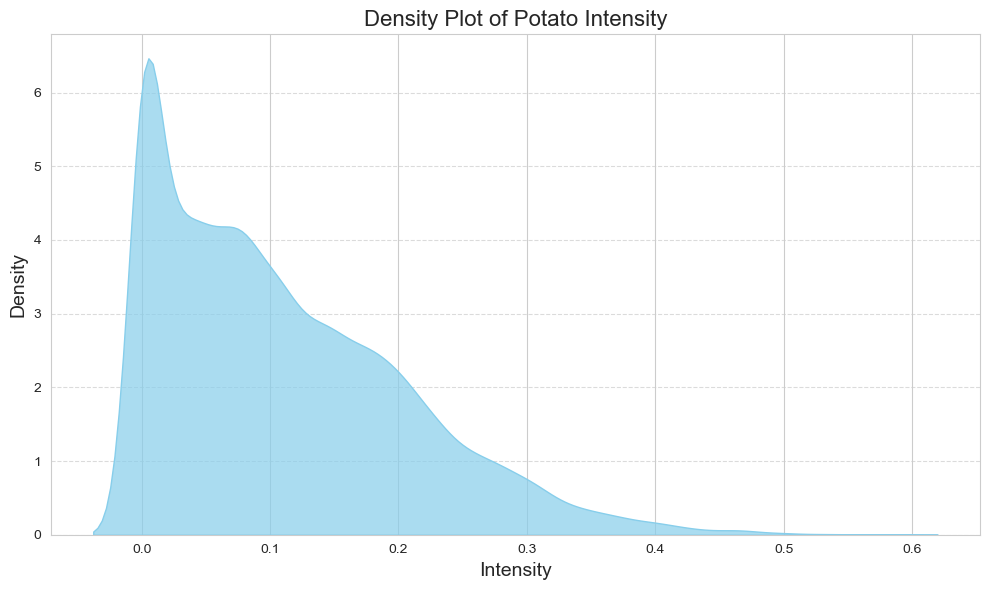

In [82]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=potato_data, x='intensity', fill=True, color='skyblue', alpha=0.7)

# Add titles and labels
plt.title("Density Plot of Potato Intensity", fontsize=16)
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Merging Potato Intensity with Main Dataset

Potato intensity was calculated for all unique fields across 2010-2023. Now, we merge this data with the original dataset, ensuring that the potato intensity values align with the fields and their respective years. Rows for the year 2024 are excluded from the original dataset, as crop data for 2024 is not yet available.

In [85]:
# Filter the fields dataset to exclude year 2024
fields = pd.read_csv('output_data/5_with_crop_type.csv')
fields_filtered = fields[fields['year'] <= 2023]

print(fields.shape)
print(fields_filtered.shape)

(3331, 17)
(3040, 17)


In [87]:
potato_data_unique = potato_data.groupby(['field_fvid', 'cdl_year']).first().reset_index()
potato_data_unique = potato_data_unique.rename(columns={'cdl_year': 'year'})

df_with_intensity = fields_filtered.merge(
    potato_data_unique[['field_fvid', 'year', 'intensity']],
    on=['field_fvid', 'year'],
    how='left'
)

# Verify the result
print(df_with_intensity[['field_fvid', 'year', 'intensity']].head())


   field_fvid  year  intensity
0       62992  2014   0.070824
1       62996  2014   0.035482
2       62999  2014   0.105727
3       63009  2014   0.068918
4       63016  2014   0.035030


In [89]:
df_with_intensity.shape

(3040, 18)

### Potato Proportion for the Last 5 Years

We calculated the proportion of potato planting for the last 5 years for each given field. This was done by dividing the number of years potato was planted by the total 5 years. The maximum proportion observed is 0.8.

Below is the distribution plot of the potato proportion.

In [98]:
crop_codes = pd.read_csv("output_data/crop_codes.csv")
print(crop_codes.shape)
print(crop_codes.head())
crop_codes = crop_codes.drop_duplicates(subset=['field_fvid', 'cdl_year'])
print(crop_codes.shape)

(28133, 6)
   field_fvid  crop_code  pixel_count  total_area  buffer_radius  cdl_year
0       62992         42            4  314.015733             10      2010
1       62996         42            2  314.015741             10      2010
2       62999          1            2  206.499748             10      2010
3       63009          1            2  222.800598             10      2010
4       63009          5            2   91.215149             10      2010
(25886, 6)


In [104]:
def calculate_potato_proportion(row, crop_codes):
    """
    Calculate the potato proportion (number of years with crop_code == 43) 
    in the last 5 years for a given field and year.
    """
    field_id = row['field_fvid']
    current_year = row['year']
    
    last_5_years = crop_codes[
        (crop_codes['field_fvid'] == field_id) &
        (crop_codes['cdl_year'] > current_year - 5) &
        (crop_codes['cdl_year'] <= current_year)
    ]['cdl_year'].drop_duplicates()
    
    potato_years = crop_codes[
        (crop_codes['field_fvid'] == field_id) &
        (crop_codes['cdl_year'].isin(last_5_years)) &
        (crop_codes['crop_code'] == 43)
    ]['cdl_year'].nunique()
    
    proportion = potato_years / 5
    return proportion

print("Calculating potato proportions...")
df_with_intensity['potato_proportion'] = df_with_intensity.apply(
    lambda row: calculate_potato_proportion(row, crop_codes), axis=1
)

print("Calculation complete. Results:")
print(df_with_intensity[['field_fvid', 'year', 'potato_proportion']].head())

print("Max proportion:", df_with_intensity['potato_proportion'].max())
print("Min proportion:", df_with_intensity['potato_proportion'].min())


Calculating potato proportions...
Calculation complete. Results:
   field_fvid  year  potato_proportion
0       62992  2014                0.4
1       62996  2014                0.0
2       62999  2014                0.4
3       63009  2014                0.4
4       63016  2014                0.4
Max proportion: 0.8
Min proportion: 0.0


In [108]:
crop_codes[(crop_codes['field_fvid'] == 62992) & (crop_codes['cdl_year'] <= 2014)]

,field_fvid,crop_code,pixel_count,total_area,buffer_radius,cdl_year
0,62992,42,4,314.015733,10,2010
2048,62992,43,4,314.015733,10,2011
4066,62992,50,3,257.012448,10,2012
6094,62992,1,3,96.095987,10,2013
8103,62992,43,4,314.015733,10,2014


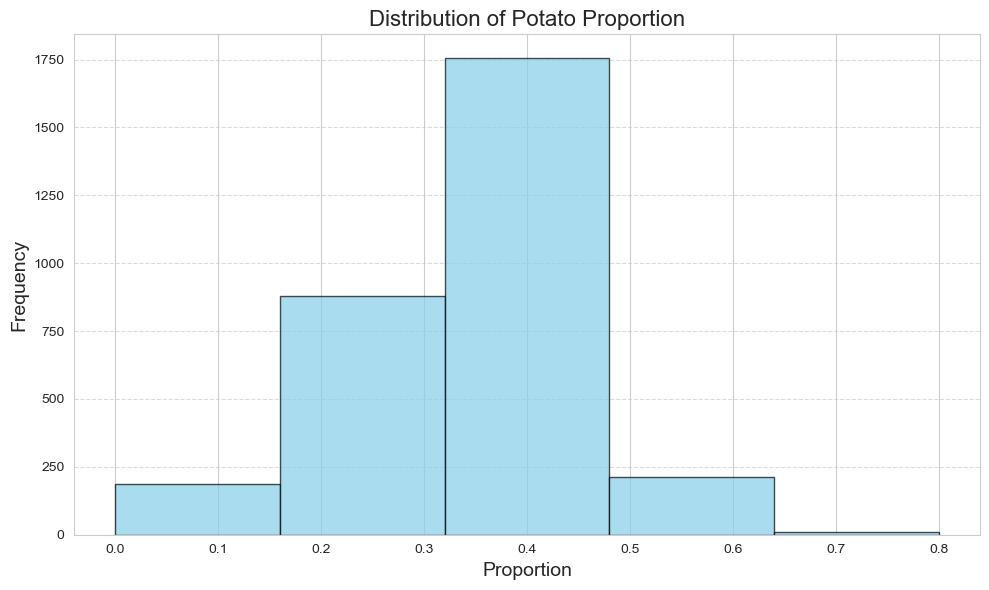

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(df_with_intensity['potato_proportion'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Distribution of Potato Proportion", fontsize=16)
plt.xlabel("Proportion", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Intensity for the Last 5 Years

We calculated the intensity for each field over the last 5 years. Below is the density plot illustrating the distribution of these values.

In [113]:
def calculate_intensity_5y(row, potato_data):
    field_id = row['field_fvid']
    current_year = row['year']
    
    last_5_years = potato_data[
        (potato_data['field_fvid'] == field_id) &
        (potato_data['cdl_year'] >= current_year - 4) &  
        (potato_data['cdl_year'] <= current_year)
    ]
    
    if not last_5_years.empty:
        intensity_5y = last_5_years['intensity'].mean()
    else:
        intensity_5y = None 
    
    return intensity_5y

df_with_intensity['intensity_5y'] = df_with_intensity.apply(
    lambda row: calculate_intensity_5y(row, potato_data), axis=1
)

print(df_with_intensity[['field_fvid', 'year', 'intensity', 'intensity_5y']].head())

df_with_intensity.to_csv("output_data/7_with_prop_and_intensity.csv", index=False)

   field_fvid  year  intensity  intensity_5y
0       62992  2014   0.070824      0.028712
1       62996  2014   0.035482      0.101801
2       62999  2014   0.105727      0.070153
3       63009  2014   0.068918      0.094635
4       63016  2014   0.035030      0.037756


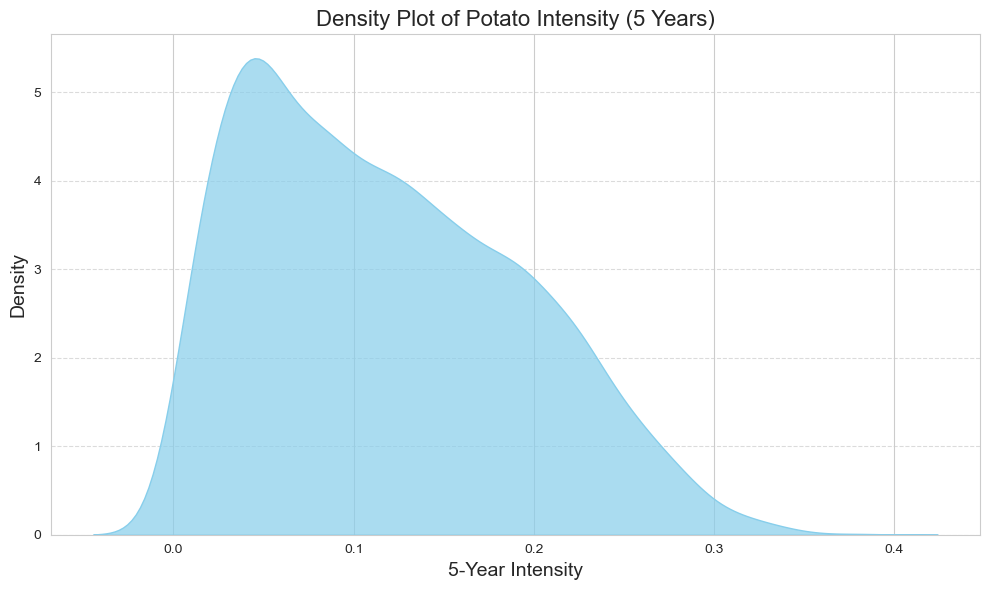

In [115]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_with_intensity, x='intensity_5y', fill=True, color='skyblue', alpha=0.7)

# Add titles and labels
plt.title("Density Plot of Potato Intensity (5 Years)", fontsize=16)
plt.xlabel("5-Year Intensity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Merging Climate Data

We added climate and environmental data using the meteostat library (Daily and Point modules) and datetime. Winter and summer data were added separately, as these seasonal details might provide meaningful insights.

In [118]:
df_intensity = pd.read_csv("output_data/7_with_prop_and_intensity.csv")

In [120]:
import time
from meteostat import Daily, Point
from datetime import datetime

def get_climate_data(lat, lon, year, start_month=None, end_month=None):
    location = Point(lat, lon)
    start_date = datetime(year, start_month, 1) if start_month else datetime(year, 1, 1)
    end_date = datetime(year, end_month, 28 if start_month == 2 else 31) if end_month else datetime(year, 12, 31)
    climate_data = Daily(location, start_date, end_date).fetch()

    return {
        'tmin': climate_data['tmin'].min() if 'tmin' in climate_data else None,
        'tmax': climate_data['tmax'].max() if 'tmax' in climate_data else None,
        'prcp': climate_data['prcp'].mean() if 'prcp' in climate_data else None,
        'tavg': climate_data['tavg'].mean() if 'tavg' in climate_data else None,
        'tsun': climate_data['tsun'].sum() if 'tsun' in climate_data else None
    }

def add_climate_info(df):
    print("Starting climate data processing...")
    start_time = time.time()  # Start the timer

    climate_data_list = []

    for idx, row in df.iterrows():
        lat, lon, year = row['lat'], row['lng'], row['year']

        # Annual metrics
        annual_data = get_climate_data(lat, lon, year)
        tmin_annual = annual_data['tmin']
        tmax_annual = annual_data['tmax']
        annual_prcp = annual_data['prcp']

        # Summer metrics
        summer_data = get_climate_data(lat, lon, year, start_month=5, end_month=8)
        summer_tmin = summer_data['tmin']
        summer_avg = summer_data['tavg']
        summer_prcp = summer_data['prcp']
        summer_tsun = summer_data['tsun']

        # Winter metrics
        winter_data = pd.concat([
            Daily(Point(lat, lon), datetime(year - 1, 12, 1), datetime(year - 1, 12, 31)).fetch(),
            Daily(Point(lat, lon), datetime(year, 1, 1), datetime(year, 2, 28)).fetch()
        ])
        winter_avg = winter_data['tavg'].mean() if 'tavg' in winter_data.columns else None
        winter_tmax = winter_data['tmax'].max() if 'tmax' in winter_data.columns else None
        winter_snow = winter_data['snow'].mean() if 'snow' in winter_data.columns else None

        # Append to the results list
        climate_data_list.append({
            'tmin_annual': tmin_annual,
            'tmax_annual': tmax_annual,
            'annual_prcp': annual_prcp,
            'summer_tmin': summer_tmin,
            'summer_avg': summer_avg,
            'summer_prcp': summer_prcp,
            'summer_tsun': summer_tsun,
            'winter_avg': winter_avg,
            'winter_tmax': winter_tmax,
            'winter_snow': winter_snow
        })

        # Progress tracking
        if idx % (len(df) // 10) == 0:
            print(f"Processed {int((idx / len(df)) * 100)}% of rows...")

    # End the timer and print processing time
    end_time = time.time()
    print(f"Climate data processing completed in {end_time - start_time:.2f} seconds.")

    climate_df = pd.DataFrame(climate_data_list)
    return pd.concat([df.reset_index(drop=True), climate_df], axis=1)

# Apply the function to add climate data
df_with_climate = add_climate_info(df_with_intensity)

Starting climate data processing...
Processed 0% of rows...
Processed 10% of rows...
Processed 20% of rows...
Processed 30% of rows...
Processed 40% of rows...
Processed 50% of rows...
Processed 60% of rows...
Processed 70% of rows...
Processed 80% of rows...
Processed 90% of rows...
Climate data processing completed in 115.47 seconds.


In [122]:
df_with_climate.to_csv("output_data/temp_climate_data.csv", index = False)

In [124]:
df_with_climate.head()

,grower,farm,field,field_fvid,lat,lng,year,tmin,tmax,gdd,...,tmin_annual,tmax_annual,annual_prcp,summer_tmin,summer_avg,summer_prcp,summer_tsun,winter_avg,winter_tmax,winter_snow
0,Wisconsin Central Farms,WCF,1 Necedah,62992,44.057164,-90.040412,2014,44.815974,83.173633,13.772113,...,-30.9,31.0,NaN,-4.7,18.290083,NaN,0.0,-12.111905,7.0,NaN
1,Wisconsin Central Farms,WCF,13 Nepco N 1/2,62996,44.209406,-90.021382,2014,45.498328,79.713370,12.804045,...,-31.1,31.1,1.244492,-1.1,18.627049,1.47381,0.0,-12.090588,6.1,NaN
2,Wisconsin Central Farms,WCF,16 13th St,62999,44.100775,-90.050524,2014,45.224964,82.761841,14.263578,...,-30.9,31.0,1.244492,-4.7,18.342276,1.47381,0.0,-11.597778,7.0,NaN
3,Wisconsin Central Farms,WCF,26 Huebner,63009,44.171606,-89.975877,2014,45.584387,82.216665,13.292737,...,-31.1,31.1,1.244492,-1.1,18.633333,1.47381,0.0,-12.063333,6.1,NaN
4,Wisconsin Central Farms,WCF,7 N Home,63016,44.329762,-89.931300,2014,45.715179,78.727568,12.237354,...,-31.1,31.1,1.244492,-1.1,18.627049,1.47381,0.0,-12.090588,6.1,NaN


In [126]:
df_with_climate.shape

(3040, 30)

In [128]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree


# Step 1: Remove unnecessary columns
df_with_climate = df_with_climate.drop(columns=['summer_tsun', 'winter_snow'], errors='ignore')

# Step 2: Separate rows with missing and non-missing values
missing_cols = ['tmin_annual', 'tmax_annual', 'annual_prcp', 'summer_tmin', 'summer_avg', 'summer_prcp', 'winter_avg', 'winter_tmax']
missing_rows = df_with_climate[df_with_climate[missing_cols].isnull().any(axis=1)]
non_missing_rows = df_with_climate.dropna(subset=missing_cols)

# Step 3: Use spatial coordinates to find the nearest non-missing field
null_coords = missing_rows[['lat', 'lng']].values
non_null_coords = non_missing_rows[['lat', 'lng']].values

# Create a cKDTree for efficient nearest neighbor search
tree = cKDTree(non_null_coords)
distances, indices = tree.query(null_coords, k=1)

# Step 4: Fill missing values with data from the nearest non-missing field
for i, missing_index in enumerate(missing_rows.index):
    nearest_index = non_missing_rows.index[indices[i]]
    for col in missing_cols:
        if pd.isnull(df_with_climate.loc[missing_index, col]):
            df_with_climate.loc[missing_index, col] = df_with_climate.loc[nearest_index, col]

# Step 5: Verify the filled DataFrame
print("Missing values after filling:")
print(df_with_climate[missing_cols].isnull().sum())


Missing values after filling:
tmin_annual    0
tmax_annual    0
annual_prcp    0
summer_tmin    0
summer_avg     0
summer_prcp    0
winter_avg     0
winter_tmax    0
dtype: int64


In [130]:
df_with_climate.to_csv("output_data/8_final_with_climate_data.csv", index = False)

### Some plots

In [133]:
final_data = pd.read_csv("output_data/8_final_with_climate_data.csv")
final_data.shape

(3040, 28)

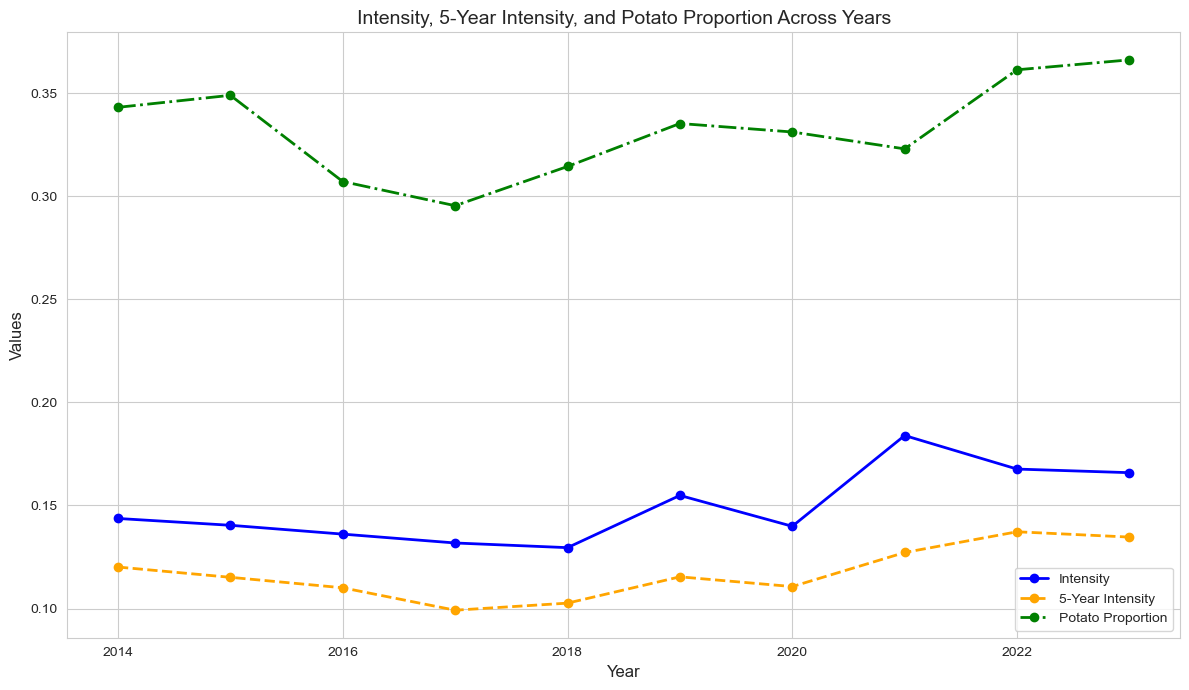

In [135]:
yearly_summary = df_with_intensity.groupby('year').agg({
    'intensity': 'mean',
    'intensity_5y': 'mean',
    'potato_proportion': 'mean'
}).reset_index()

plt.figure(figsize=(12, 7))

plt.plot(yearly_summary['year'], yearly_summary['intensity'], 
         label='Intensity', color='blue', marker='o', linewidth=2)
plt.plot(yearly_summary['year'], yearly_summary['intensity_5y'], 
         label='5-Year Intensity', color='orange', marker='o', linestyle='--', linewidth=2)
plt.plot(yearly_summary['year'], yearly_summary['potato_proportion'], 
         label='Potato Proportion', color='green', marker='o', linestyle='-.', linewidth=2)

plt.title("Intensity, 5-Year Intensity, and Potato Proportion Across Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

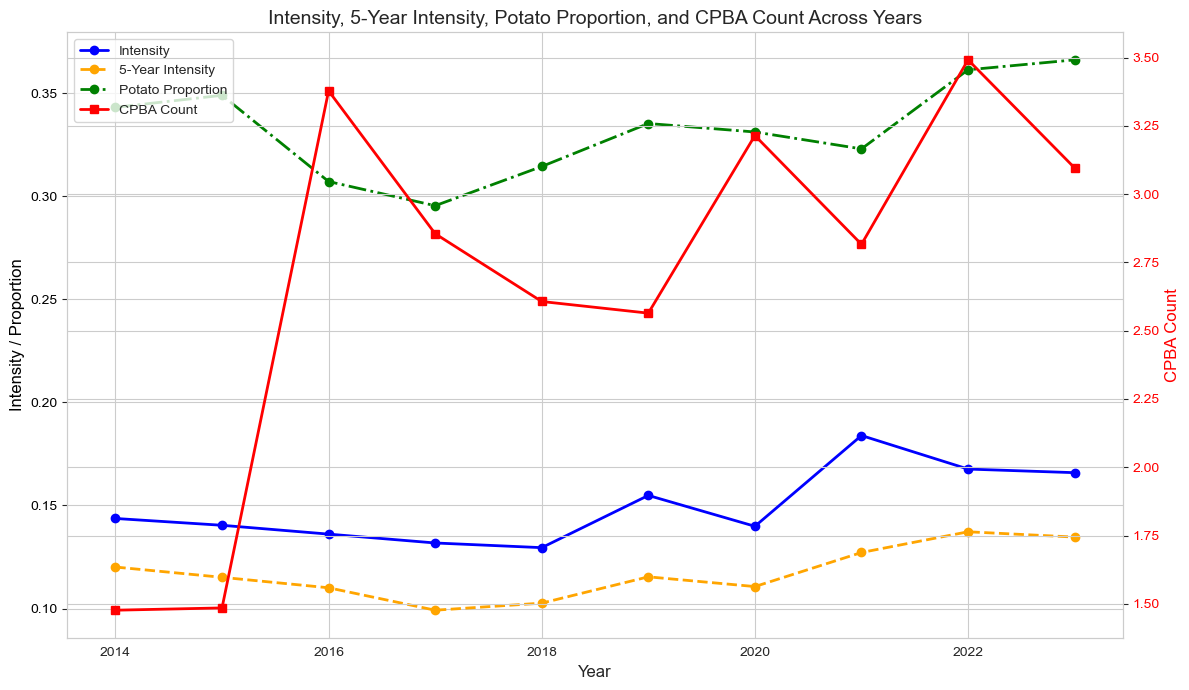

In [137]:
yearly_summary = df_with_intensity.groupby('year').agg({
    'intensity': 'mean',
    'intensity_5y': 'mean',
    'potato_proportion': 'mean',
    'cpba_count': 'mean'  # Add cpba_count for the secondary axis
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Intensity, 5-Year Intensity, and Potato Proportion (Left Y-Axis)
ax1.plot(yearly_summary['year'], yearly_summary['intensity'], 
         label='Intensity', color='blue', marker='o', linewidth=2)
ax1.plot(yearly_summary['year'], yearly_summary['intensity_5y'], 
         label='5-Year Intensity', color='orange', marker='o', linestyle='--', linewidth=2)
ax1.plot(yearly_summary['year'], yearly_summary['potato_proportion'], 
         label='Potato Proportion', color='green', marker='o', linestyle='-.', linewidth=2)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Intensity / Proportion", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()  # Create a secondary Y-axis
ax2.plot(yearly_summary['year'], yearly_summary['cpba_count'], 
         label='CPBA Count', color='red', marker='s', linewidth=2)
ax2.set_ylabel("CPBA Count", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

plt.title("Intensity, 5-Year Intensity, Potato Proportion, and CPBA Count Across Years", fontsize=14)

plt.tight_layout()
plt.show()

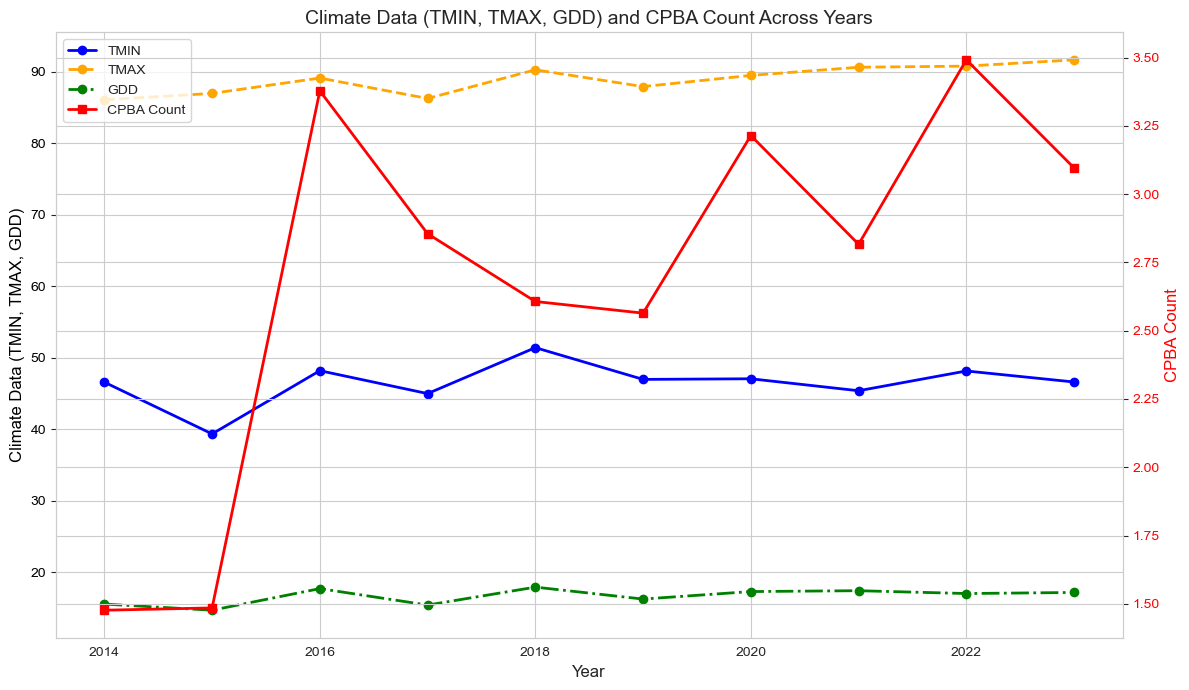

In [139]:
yearly_summary = df_with_intensity.groupby('year').agg({
    'tmin': 'mean',
    'tmax': 'mean',
    'gdd': 'mean',
    'cpba_count': 'mean',  # For secondary axis
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(yearly_summary['year'], yearly_summary['tmin'], 
         label='TMIN', color='blue', marker='o', linewidth=2)
ax1.plot(yearly_summary['year'], yearly_summary['tmax'], 
         label='TMAX', color='orange', marker='o', linestyle='--', linewidth=2)
ax1.plot(yearly_summary['year'], yearly_summary['gdd'], 
         label='GDD', color='green', marker='o', linestyle='-.', linewidth=2)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Climate Data (TMIN, TMAX, GDD)", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()  # Create a secondary Y-axis
ax2.plot(yearly_summary['year'], yearly_summary['cpba_count'], 
         label='CPBA Count', color='red', marker='s', linewidth=2)
ax2.set_ylabel("CPBA Count", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

plt.title("Climate Data (TMIN, TMAX, GDD) and CPBA Count Across Years", fontsize=14)

plt.tight_layout()
plt.show()

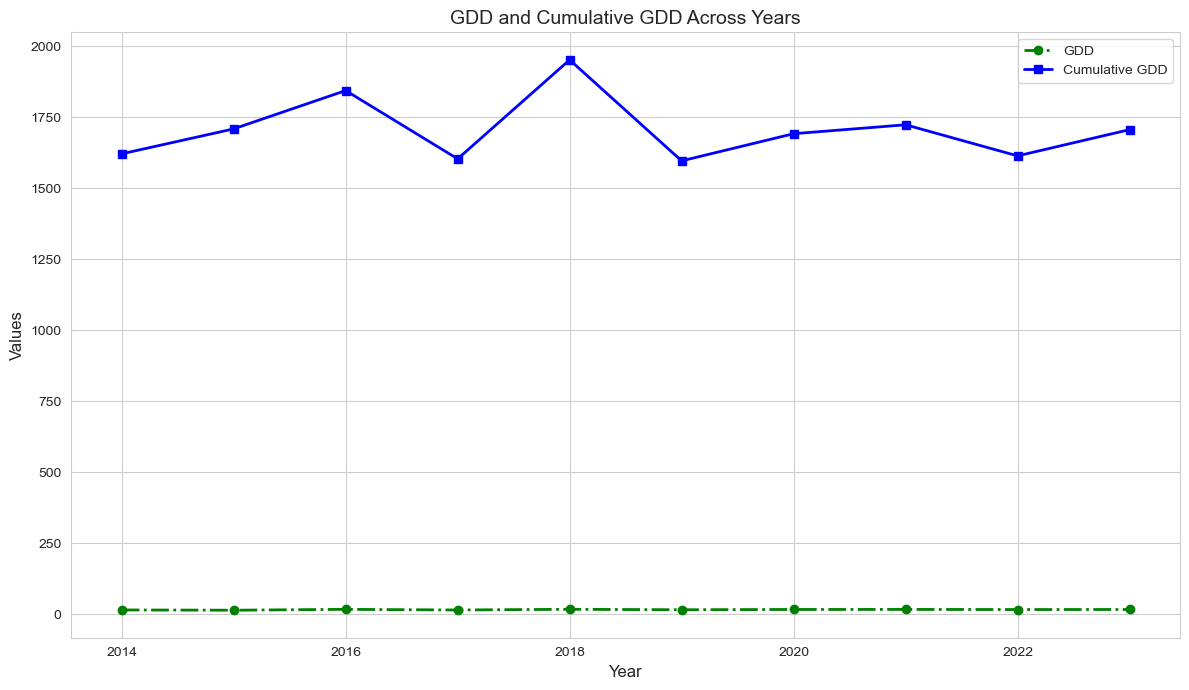

In [143]:
yearly_summary = df_with_intensity.groupby('year').agg({
    'gdd': 'mean',
    'cum_gdd': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(yearly_summary['year'], yearly_summary['gdd'], 
        label='GDD', color='green', marker='o', linestyle='-.', linewidth=2)
ax.plot(yearly_summary['year'], yearly_summary['cum_gdd'], 
        label='Cumulative GDD', color='blue', marker='s', linewidth=2)

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Values", fontsize=12)
ax.set_title("GDD and Cumulative GDD Across Years", fontsize=14)
ax.grid(True)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()